# SMOTE

In [16]:
# Data Processing
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [17]:
# read RData
#res = pyreadr.read_r('5v_cleandf.RData')
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [18]:
#df = res["df"]
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage.csv')
# df.dropna()
# df.to_csv('yale_triage.csv')

In [4]:
# df = df.dropna()
# with all the 972 columns, if you run dropna directly, there actually ends up being 0 
# remaining rows

df.reset_index(inplace=True, drop=True)
df.shape

(560486, 973)

In [8]:
keys = df.keys()
#new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age']
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age']
reach = False

for i in range(len(keys)):
    if(keys[i]!='2ndarymalig' and reach==False):
        # print(keys[i])
        continue
    reach = True
    if(keys[i]!='whtblooddx'):
        new_keys.append(keys[i])
    else:
        new_keys.append(keys[i])
        break

reach = False
for i in range(len(keys)):
    if(keys[i]!='cc_abdominalcramping' and reach==False):
        continue
    reach = True
    if(keys[i]!='cc_wristpain'):
        new_keys.append(keys[i])
    else:
        new_keys.append(keys[i])
        break

new_keys.append('esi')
print(len(list(set(new_keys))))
print(len(new_keys))
#df = df[['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age', 'gender', 'arrivalmode', 'previousdispo']]
df = df[new_keys]
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.head()


489
489


,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,97.0,18.0,63.0,146.0,85.0,97.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,97.8,16.0,78.0,134.0,78.0,97.0,66.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,98.4,18.0,101.0,133.0,72.0,97.0,84.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,98.5,18.0,76.0,143.0,87.0,98.0,86.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,97.8,17.0,88.0,155.0,75.0,98.0,87.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
df = df[(df["triage_vital_temp"] >= 51.8) & (df["triage_vital_temp"] <= 108.14) & (df["triage_vital_hr"] > 0) & (df["triage_vital_hr"] < 140) & (df["triage_vital_o2"] > 0) & (df["triage_vital_o2"] < 100)]
df = df.drop(df.loc[df['triage_vital_sbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_dbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_rr'] > 200].index) # impossible

/home/csuser/mambaforge/envs/tim/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


109106    2.0
141020    1.0
Name: esi, dtype: float64
(268469, 489)


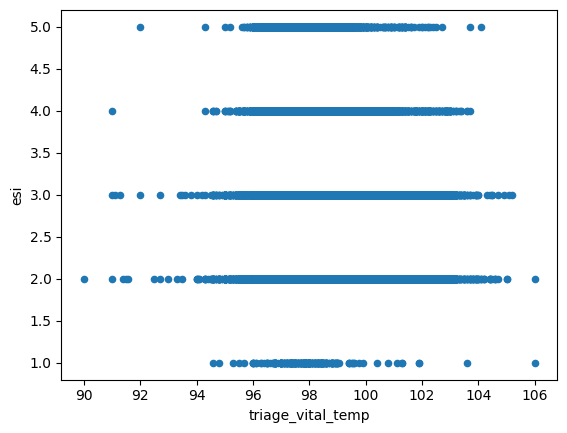

In [10]:
df.plot.scatter(x="triage_vital_temp", y="esi")
print(df.esi[df.loc[df["triage_vital_temp"] == max(df.triage_vital_temp)].index])
print(df.shape)

In [11]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,97.0,18.0,63.0,146.0,85.0,97.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,97.8,16.0,78.0,134.0,78.0,97.0,66.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,98.4,18.0,101.0,133.0,72.0,97.0,84.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,98.5,18.0,76.0,143.0,87.0,98.0,86.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,97.8,17.0,88.0,155.0,75.0,98.0,87.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,98.0,16.0,71.0,117.0,74.0,95.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,98.1,16.0,89.0,114.0,75.0,94.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,97.5,18.0,89.0,125.0,82.0,94.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,97.5,18.0,89.0,135.0,92.0,98.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
df["esi"].value_counts()

3.0    117852
4.0     71472
2.0     67048
5.0     11835
1.0       262
Name: esi, dtype: int64

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-02-29 21:28:40.649188: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 21:28:40.676019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 21:28:41.163955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
# Normalizing the data
numerical_cols = ['triage_vital_temp', 'triage_vital_hr', 'triage_vital_o2', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'age']
for col in numerical_cols:
   df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [13]:
# Oversample and plot imbalanced dataset with SMOTE
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [16]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [17]:
X = df.drop(['esi'], axis=1).to_numpy()
y = df['esi'].to_numpy()
counter = Counter(y)
print(counter)

Counter({3.0: 117852, 4.0: 71472, 2.0: 67048, 5.0: 11835, 1.0: 262})


In [18]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


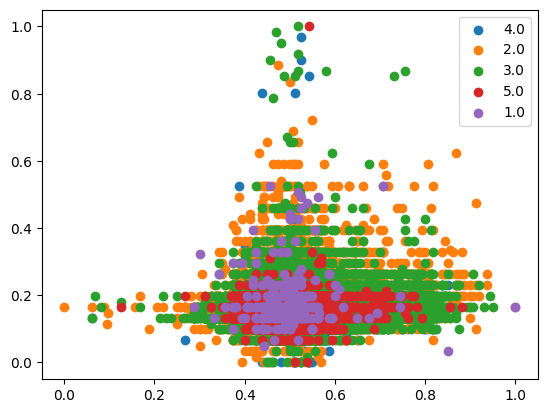

In [19]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [20]:
over = SMOTE(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
# under = RandomUnderSampler(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
steps = [('o', over),]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

In [21]:
counter = Counter(y)
print(counter)

Counter({4.0: 117852, 2.0: 117852, 3.0: 117852, 5.0: 117852, 1.0: 117852})


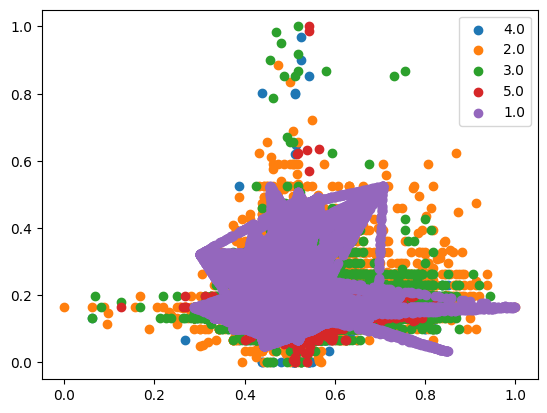

In [22]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [23]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [24]:
import numpy as np
import pandas as pd

# Concatenate X and y numpy arrays
Xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)

In [25]:
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [26]:

# Create a pandas DataFrame from the concatenated array
#new_keys.remove('esi')
#new_keys.append('esi')
df = pd.DataFrame(data=Xy, columns=new_keys)
df.head()
df.to_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv')

In [19]:
# clean up the first column since its unnamed and has indices
import pandas as pd

# Read the CSV file
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv')

# Remove the first column and all data under it
df = df.iloc[:, 1:]

# Write the modified DataFrame back to the CSV file
df.to_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv', index=False)


# TRAIN

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch

In [32]:
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv')

# Split the data into features (X) and target (y)
print(df.shape)
x = df.drop(['esi'], axis=1)
y = df['esi']

x = x.to_numpy().astype(np.float32)
y = y.to_numpy().reshape(-1,1).astype(np.int_)

print(np.asarray(x))

# x = tf.constant(np.asarray(x), dtype=tf.float64)
# y = tf.constant(np.asarray(y).reshape(-1, 1), dtype=tf.float64)

print(x.shape)

# convert to one hot vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)

y = ohe.transform(y)
y.shape

(589260, 489)
[[0.4375     0.16393442 0.3027523  ... 0.         0.         0.        ]
 [0.4875     0.13114753 0.44036698 ... 0.         0.         0.        ]
 [0.525      0.16393442 0.6513761  ... 0.         0.         0.        ]
 ...
 [0.47515714 0.13135365 0.3853211  ... 0.         0.         0.        ]
 [0.48324358 0.18509515 0.59691554 ... 0.         0.         0.        ]
 [0.4848628  0.16591077 0.4381549  ... 0.         0.         0.        ]]
(589260, 488)
[array([1, 2, 3, 4, 5])]


(589260, 5)

In [33]:
df.head()

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [34]:
# # yale model
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    dense1 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(inputs)
    dense2 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense1)
    dense3 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense2)
    dense4 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense3)
    output = layers.Dense(units=num_classes, activation='softmax')(dense4)
    return keras.Model(inputs, output)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [36]:
model = make_model(input_shape=(488), num_classes=y[0].shape[0])
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.01, weight_decay=1e-6),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

# make the save callback
best_model_path = '/media/csuser/DATA/ARTEMIS/models/yale_smote'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# load the saved model by:
# model.load_weights(best_model_path)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 488)]             0         
                                                                 
 dense_25 (Dense)            (None, 50)                24450     
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dense_27 (Dense)            (None, 50)                2550      
                                                                 
 dense_28 (Dense)            (None, 50)                2550      
                                                                 
 dense_29 (Dense)            (None, 5)                 255       
                                                                 
Total params: 32,355
Trainable params: 32,355
Non-trainable

In [37]:
history = (model.fit(X_train, y_train, epochs=5000, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback]))


Epoch 1/5000
11786/11786 [==============================] - 9s 733us/step - loss: 0.0793 - accuracy: 0.7048 - val_loss: 0.0744 - val_accuracy: 0.7256
Epoch 2/5000
11786/11786 [==============================] - 8s 694us/step - loss: 0.0722 - accuracy: 0.7353 - val_loss: 0.0723 - val_accuracy: 0.7348
Epoch 3/5000
11786/11786 [==============================] - 8s 665us/step - loss: 0.0694 - accuracy: 0.7476 - val_loss: 0.0712 - val_accuracy: 0.7392
Epoch 4/5000
11786/11786 [==============================] - 8s 668us/step - loss: 0.0676 - accuracy: 0.7556 - val_loss: 0.0700 - val_accuracy: 0.7426
Epoch 5/5000
11786/11786 [==============================] - 8s 676us/step - loss: 0.0662 - accuracy: 0.7612 - val_loss: 0.0694 - val_accuracy: 0.7481
Epoch 6/5000
11786/11786 [==============================] - 8s 691us/step - loss: 0.0650 - accuracy: 0.7670 - val_loss: 0.0683 - val_accuracy: 0.7518
Epoch 7/5000
11786/11786 [==============================] - 8s 666us/step - loss: 0.0641 - accuracy:

# PREDICT AND PLOT

##### For 1000 epochs, from data saved in `'/media/csuser/DATA/ARTEMIS/yale/NN_acc_report.csv'`

# PREDICT AND PLOT

##### For 5000 epochs, from data saved in history

In [38]:
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [40]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


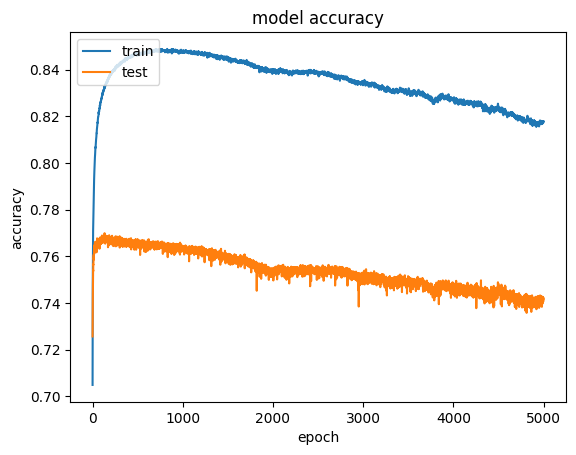

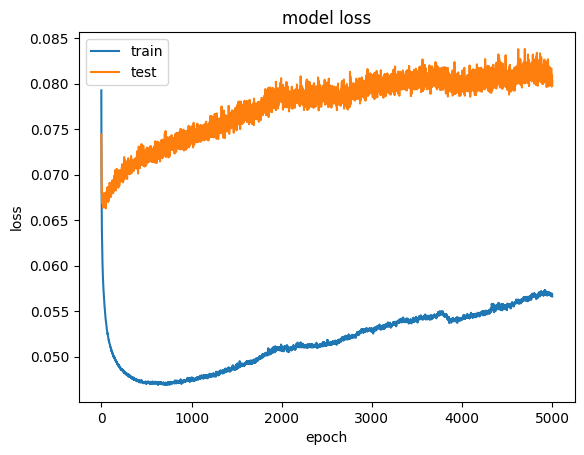

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_ACCURACYvsEPOCHS.png', dpi=500)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_LOSSvsEPOCHS.png', dpi=500)
plt.show()

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model.load_weights('/media/csuser/DATA/ARTEMIS/models/yale_smote')

(117852, 488)
3683/3683 [==============================] - 1s 332us/step
(117852, 5)
(117852, 5)
[4 4 0 ... 1 4 1]
[4 4 0 ... 1 4 1]


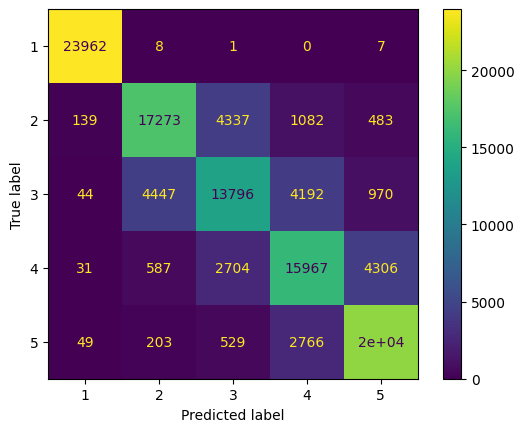

In [42]:
# CONFUSION MATRIX
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, recall_score, ConfusionMatrixDisplay
from numpy import argmax

print(X_test.shape)
y_pred = model.predict(X_test)
print(y_test.shape)
print(y_pred.shape)
y_test = argmax(a=y_test, axis=1)
y_pred = argmax(a=y_pred, axis=1)
print(y_test)
print(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test+1, y_pred+1)
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_confusion_yale_smote.png', dpi=500)

In [43]:
y_pred

array([4, 4, 0, ..., 1, 4, 1])

In [44]:
cm = confusion_matrix(y_test, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [45]:
print(TPR, TNR, PPV, NPV, FPR, FDR, ACC)

[0.99933272 0.7408853  0.58834065 0.67671117 0.84916652] [0.99719837 0.94451966 0.91980128 0.9147013  0.93887805] [0.98914345 0.76707523 0.64566855 0.66509768 0.77594715] [0.99982911 0.93663331 0.89995336 0.91871703 0.96149462] [0.00280163 0.05548034 0.08019872 0.0852987  0.06112195] [0.01085655 0.23292477 0.35433145 0.33490232 0.22405285] [0.99763262 0.90423582 0.85385059 0.86705359 0.92097716]
